In this notebook, we will look at necessary steps that happen before any machine learning takes place. 
* load the data
* look at the variables in the dataset, in particular make the difference
  between numerical and categorical variables, which need different
  preprocessing in most machine learning workflows
* visualize the distribution of the variables to gain some insights into the dataset.

In [1]:
# Inline plots
%matplotlib inline

# plotting style
import seaborn as sns
sns.set_context('talk')

## Loading the adult census dataset

We will use data from the "Current Population adult_census" from 1994 that we
downloaded from [OpenML](http://openml.org/).

In [2]:
import pandas as pd

adult_census = pd.read_csv("https://www.openml.org/data/get_csv/1595261/adult-census.csv")

# Or use the local copy:
# adult_census = pd.read_csv('../datasets/adult-census.csv')

We can look at the OpenML webpage to know more about this dataset.

In [3]:
from IPython.display import IFrame
IFrame('https://www.openml.org/d/1590', width=1200, height=600)

## Look at the variables in the dataset
The data are stored in a pandas dataframe.

In [4]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The column named **class** is our target variable (i.e., the variable which
we want to predict). The two possible classes are `<= 50K` (low-revenue) and
`> 50K` (high-revenue).

In [5]:
target_column = 'class'
adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

Note: classes are slighly imbalanced. Class imbalance happens often in
practice and may need special techniques for machine learning. For example in
a medical setting, if we are trying to predict whether patients will develop
a rare disease, there will be a lot more sane patients than ill patients in
the dataset.

The dataset contains both numerical and categorical data. Numerical values
can take continuous values for example `age`. Categorical values can have a
finite number of values, for exemple `native-country`.

In [6]:
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss',
                     'hours-per-week']
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country']
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

Note that for simplicity, we have ignored the "fnlwgt" (final weight) column
that was crafted by the creators of the dataset when sampling the dataset to
be representative of the full census database.

## Inspect the data
Before building a machine learning model, it is a good idea to look at the
data:
* maybe the task you are trying to achieve can be solved without machine
  learning
* you need to check that the data you need for your task is indeed present in
the dataset
* inspecting the data is a good way to find peculiarities. These can can
  arise in the data collection (for example, malfunctioning sensor or missing
  values), or the way the data is processed afterwards (for example capped
  values).

Let's look at the distribution of individual variables, to get some insights
about the data. We can start by plotting histograms, note that this only
works for numerical variables:

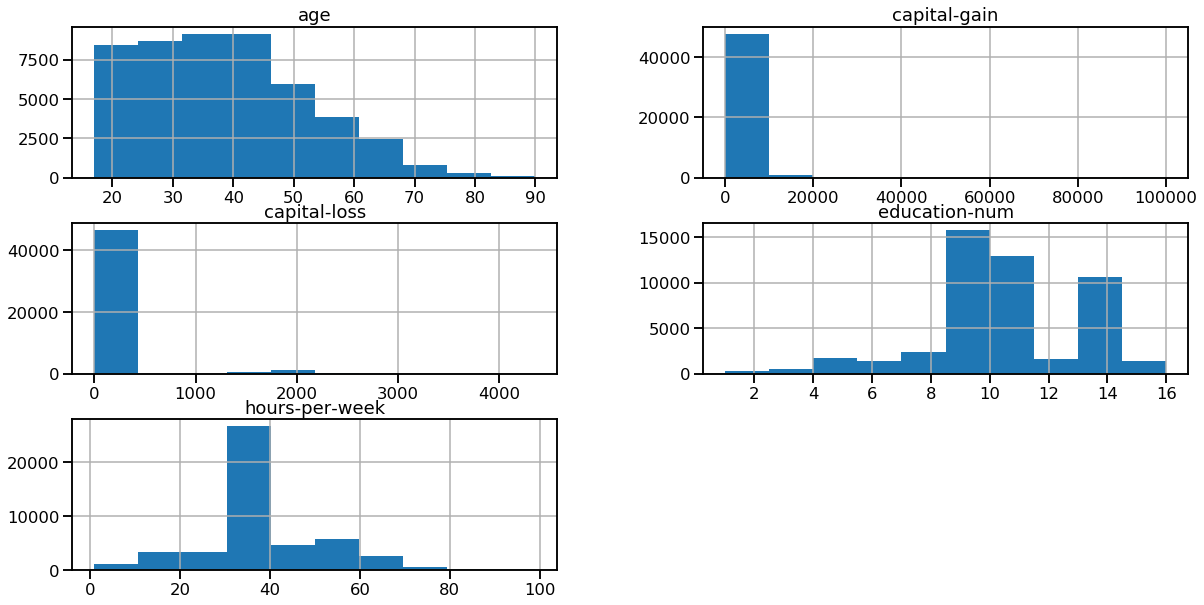

In [7]:
adult_census.hist(figsize=(20, 10));

We can already make a few comments about some of the variables:
* age: there are not that many points for 'age > 70'. The dataset description
does indicate that retired people have been filtered out (`hours-per-week > 0`).
* education-num: peak at 10 and 13, hard to tell what it corresponds to
without looking much further. We'll do that later in this notebook.
* hours per week at 40, this was very likely the standard of working hours at
the time of the data collection
* most values of capital-gain and capital-loss are close to zero

For categorical variables, we can look at the distribution of values:

In [8]:
adult_census['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [9]:
adult_census['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

`pandas_profiling` is a nice tool for inspecting the data (both numerical and
categorical variables).

In [10]:
import pandas_profiling
adult_census.profile_report()

As noted above, `education-num` distribution has two clear peaks around 10
and 13. It would be reasonable to expect that 'education-num' is the number of
years of education. Let's look at the relationship between education and
education-num.

In [11]:
pd.crosstab(index=adult_census['education'], columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


This shows that education and education-num are redundant. For
example, `education-num=2` is equivalent to `education='1st-4th'`. In
practice that means we can remove `education-num` without losing information.
Note that having redundant (or highly correlated) columns can be a problem
for machine learning algorithms.

Another way to inspect the data is to do a pairplot and show how variable
differ according to the class. In the diagonal you can see the distribution
of individual variables. The plots on the off-diagonal can reveal interesting
interactions between variables.

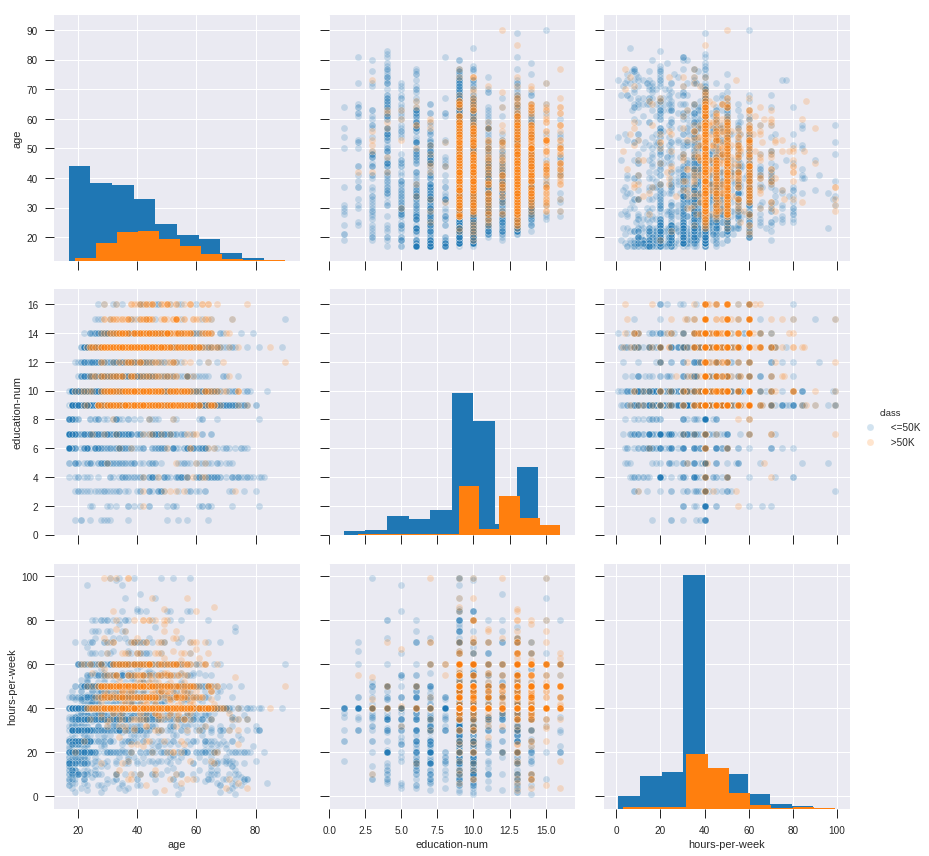

In [12]:
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
sns.pairplot(data=adult_census[:n_samples_to_plot] , vars=columns,
             hue=target_column, plot_kws={'alpha': 0.2}, height=4,
             diag_kind='hist');

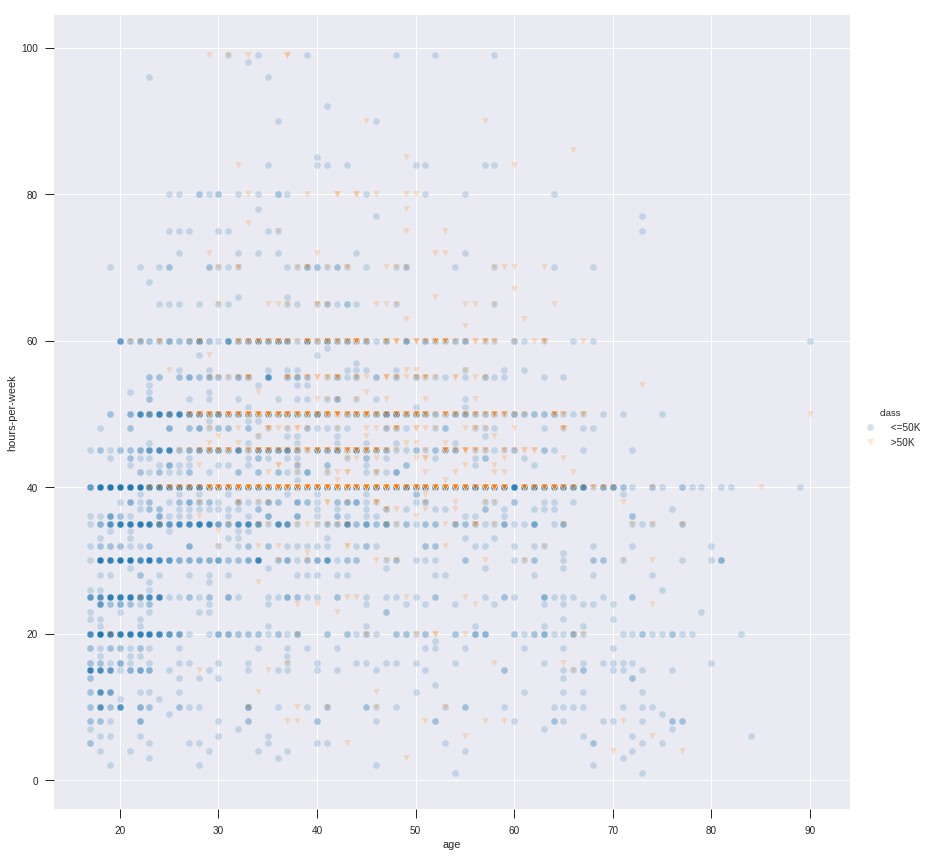

In [13]:
sns.pairplot(data=adult_census[:n_samples_to_plot], x_vars='age', y_vars='hours-per-week',
             hue=target_column, markers=['o', 'v'], plot_kws={'alpha': 0.2}, height=12);


By looking at the data you could infer some hand-written rules to predict the
class:
* if you are young (less than 25 year-old roughly), you are in the `<= 50K` class.
* if you are old (more than 70 year-old roughly), you are in the `<= 50K` class.
* if you work part-time (less than 40 hours roughly) you are in the `<= 50K` class.

These hand-written rules could work reasonably well without the need for any
machine learning. Note however that it is not very easy to create rules for
the region `40 < hours-per-week < 60` and `30 < age < 70`. We can hope that
machine learning can help in this region. Also note that visualization can
help creating hand-written rules but is limited to 2 dimensions (maybe 3
dimensions), whereas machine learning models can build models in
high-dimensional spaces.

Another thing worth mentioning in this plot: if you are young (less than 25
year-old roughly) you tend to work less and if you are old (more than 70
year-old roughly). This is a non-linear relationship between age and hours
per week. Some machine learning models can only capture linear interaction so
this may be a factor when deciding which model to chose.

In [14]:
def plot_tree_decision_function(tree, X, y, ax):
    import numpy as np
    from scipy import ndimage

    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    faces = tree.tree_.apply(
        np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
    )
    faces = faces.reshape(xx.shape)
    border = ndimage.laplace(faces) != 0
    ax.scatter(
        X.iloc[:, 0], X.iloc[:, 1], c=np.array(['tab:blue', 'tab:red'])[y],
        s=60, alpha=0.7
    )
    ax.contourf(xx, yy, Z, alpha=.4, cmap='RdBu_r')
    ax.scatter(xx[border], yy[border], marker='.', s=1)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])

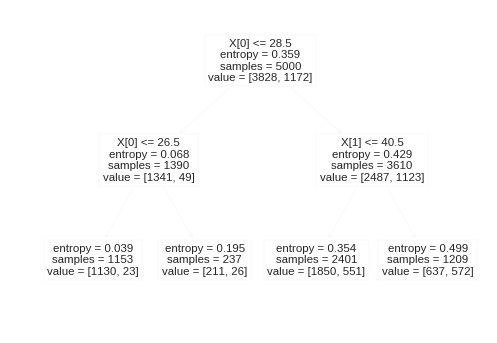

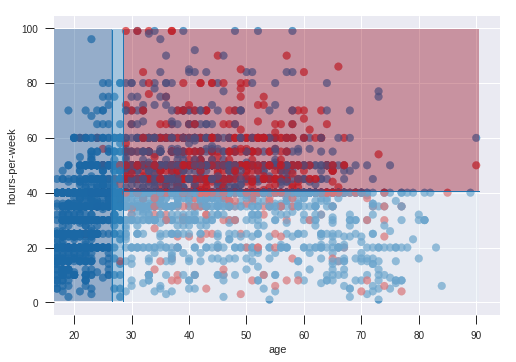

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

data_subset = adult_census[:n_samples_to_plot]
X = data_subset[["age", "hours-per-week"]]
y = LabelEncoder().fit_transform(
    data_subset[target_column].to_numpy()
)

max_depth = 2
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
tree.fit(X, y)
fig, ax = plt.subplots()
plot_tree(tree, ax=ax)
fig, ax = plt.subplots()
plot_tree_decision_function(tree, X, y, ax=ax)


In this notebook we have:
* loaded the data from a CSV file using `pandas`
* looked at the kind of variables in the dataset, and make the difference
  between categorical and numerical variables.
* inspected the data with `pandas`, `seaborn` and `pandas_profiling`. Data inspection
  can allow you to decide whether using machine learning is appropriate for
  your data and to notice potential peculiarities in your data.